In [1]:
import numpy as np
import pandas as pd
import anndata
import scanpy as sc
import seaborn as sns
import harmonypy as hm
import scrublet as scr
from matplotlib import rcParams
import umap

sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=120, color_map='viridis')
sc.logging.print_versions()

-----
anndata     0.7.5
scanpy      1.7.0
sinfo       0.3.1
-----
PIL                 8.1.0
anndata             0.7.5
backcall            0.1.0
cffi                1.14.0
cloudpickle         1.6.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask                2021.02.0
dateutil            2.8.1
decorator           4.4.2
get_version         2.1
h5py                2.10.0
harmonypy           NA
igraph              0.7.1
importlib_metadata  1.5.0
ipykernel           5.1.4
ipython_genutils    0.2.0
jedi                0.16.0
joblib              1.0.1
kiwisolver          1.3.1
legacy_api_wrap     0.0.0
leidenalg           0.8.2
llvmlite            0.34.0
matplotlib          3.2.1
mkl                 2.3.0
mpl_toolkits        NA
natsort             7.1.1
numba               0.51.2
numexpr             2.7.2
numpy               1.19.2
packaging           20.9
pandas              1.1.5
parso               0.6.2
pexpect             4.8.

In [2]:
def DEG_table(adata):
    result = adata.uns['rank_genes_groups']
    groups = result['names'].dtype.names
    markers = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
        for group in groups for key in ['names', 'pvals_adj', 'logfoldchanges']})
    return markers

In [3]:
def filtered_DEGs(adata, q_value = 1E-5, fold_change = 1):
    markers = DEG_table(adata)
    groups = adata.uns['rank_genes_groups']['names'].dtype.names
    output = pd.DataFrame()
    for i in groups:
        temp = markers[(markers.loc[:,i+'_p'] <= q_value) & (markers.loc[:,i+'_l'] >= fold_change)].loc[:,(i+'_n'):(i+'_l')]
        temp.reset_index(inplace=True, drop=True)
        output = output.join(temp, how='outer')
    return output

In [4]:
def filtered_DEG_names(adata, q_value = 1E-5, fold_change = 1):
    markers = DEG_table(adata)
    groups = adata.uns['rank_genes_groups']['names'].dtype.names
    output = pd.DataFrame()
    for i in groups:
        temp = markers[(markers.loc[:,i+'_p'] <= q_value) & (markers.loc[:,i+'_l'] >= fold_change)].loc[:,(i+'_n')]
        temp.reset_index(inplace=True, drop=True)
        output = output.join(temp, how='outer')
    return output

In [5]:
def filtered_down_reg_DEGs(adata, q_value = 1E-5, fold_change = -1):
    markers = DEG_table(adata)
    groups = adata.uns['rank_genes_groups']['names'].dtype.names
    output = pd.DataFrame()
    for i in groups:
        temp = markers[(markers.loc[:,i+'_p'] <= q_value) & (markers.loc[:,i+'_l'] <= fold_change)].loc[:,(i+'_n'):(i+'_l')]
        temp.reset_index(inplace=True, drop=True)
        output = output.join(temp, how='outer')
    return output

In [6]:
adata_orig = sc.read_h5ad('./QC_global_zfish_ven.h5ad')

In [7]:
adata_orig

AnnData object with n_obs × n_vars = 7422 × 4868
    obs: 'n_genes', 'percent_mito', 'n_counts', 'log_counts', 'percent_ribo', 'scrublet_score', 'genotype', 'Source', 'Region', 'Sample_Number', 'Sample', 'batch', 'leiden_01', 'leiden_011', 'leiden_012', 'leiden_013', 'leiden_014', 'leiden_015', 'leiden_016', 'leiden_017', 'leiden_018', 'leiden_019', 'leiden_02', 'leiden_021', 'leiden_022', 'leiden_023', 'leiden_024', 'leiden_025', 'leiden_026', 'leiden_027', 'leiden_028', 'leiden_029', 'leiden_03', 'leiden_031', 'leiden_032', 'leiden_033', 'leiden_034', 'leiden_035', 'leiden_036', 'leiden_037', 'leiden_038', 'leiden_039', 'leiden', 'leiden_annotation', 'cell_type'
    var: 'gene_ids', 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Sample_colors', 'dendrogram_leiden', 'genotype_colors', 'hvg', 'leiden', 'leiden_011_colors', 'leiden_012_colors', 'leiden_013_colors', 'leiden_014_colors', 'leiden_015_colors', 'leiden_016_colors', 'le

In [8]:
adata_orig.shape

(7422, 4868)

In [9]:
print(adata_orig.X.max())
print(adata_orig.raw.X.max())

10.0
239.0


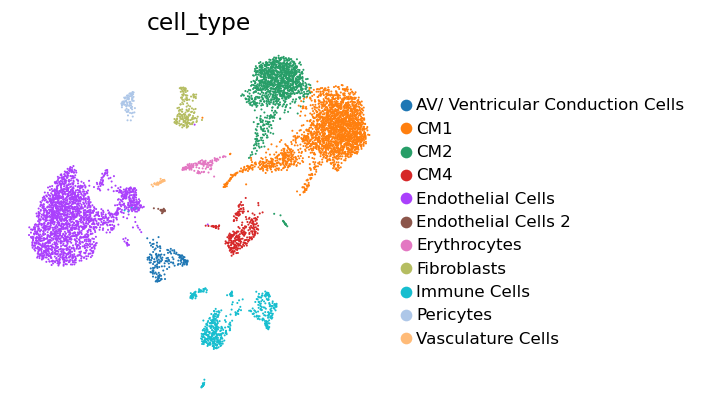

In [10]:
sc.pl.umap(adata_orig, color = ['cell_type',
                              ], size = 6, legend_fontsize = 10, frameon = False, use_raw=True, color_map='tab10' )

In [11]:
adata_AV = adata_orig[adata_orig.obs['cell_type'].isin(['AV/ Ventricular Conduction Cells'])].copy()

In [12]:
adata_CM1 = adata_orig[adata_orig.obs['cell_type'].isin(['CM1'])].copy()

In [13]:
adata_CM2 = adata_orig[adata_orig.obs['cell_type'].isin(['CM2'])].copy()

In [14]:
adata_CM4 = adata_orig[adata_orig.obs['cell_type'].isin(['CM4'])].copy()

In [15]:
adata_EC1 = adata_orig[adata_orig.obs['cell_type'].isin(['Endothelial Cells'])].copy()

In [16]:
adata_EC2 = adata_orig[adata_orig.obs['cell_type'].isin(['Endothelial Cells 2'])].copy()

In [17]:
adata_ER = adata_orig[adata_orig.obs['cell_type'].isin(['Erythrocytes'])].copy()

In [18]:
adata_F = adata_orig[adata_orig.obs['cell_type'].isin(['Fibroblasts'])].copy()

In [19]:
adata_I = adata_orig[adata_orig.obs['cell_type'].isin(['Immune Cells'])].copy()

In [20]:
adata_P = adata_orig[adata_orig.obs['cell_type'].isin(['Pericytes'])].copy()

In [21]:
adata_VAS = adata_orig[adata_orig.obs['cell_type'].isin(['Vasculature Cells'])].copy()

In [22]:
adata_wt = adata_orig[adata_orig.obs['genotype'].isin(['wildtype'])].copy()

In [24]:
adata_p1 = adata_orig[adata_orig.obs['genotype'].isin(['popdc1 null'])].copy()

In [25]:
adata_wt_cm = adata_wt[adata_wt.obs['cell_type'].isin(['CM1','CM2','CM4'])].copy()

In [26]:
adata_out = anndata.AnnData(X=adata_AV.raw.X, obs=adata_AV.obs, var=adata_AV.raw.var, obsm=adata_AV.obsm).copy()
adata_out.write('./AV_zfish_ven_RAW.h5ad')

In [27]:
adata_out = anndata.AnnData(X=adata_CM1.raw.X, obs=adata_CM1.obs, var=adata_CM1.raw.var, obsm=adata_CM1.obsm).copy()
adata_out.write('./CM1_zfish_ven_RAW.h5ad')

In [28]:
adata_out = anndata.AnnData(X=adata_CM2.raw.X, obs=adata_CM2.obs, var=adata_CM2.raw.var, obsm=adata_CM2.obsm).copy()
adata_out.write('./CM2_zfish_ven_RAW.h5ad')

In [29]:
adata_out = anndata.AnnData(X=adata_CM4.raw.X, obs=adata_CM4.obs, var=adata_CM4.raw.var, obsm=adata_CM4.obsm).copy()
adata_out.write('./CM4_zfish_ven_RAW.h5ad')

In [30]:
adata_out = anndata.AnnData(X=adata_EC1.raw.X, obs=adata_EC1.obs, var=adata_EC1.raw.var, obsm=adata_EC1.obsm).copy()
adata_out.write('./EC1_zfish_ven_RAW.h5ad')

In [31]:
adata_out = anndata.AnnData(X=adata_EC2.raw.X, obs=adata_EC2.obs, var=adata_EC2.raw.var, obsm=adata_EC2.obsm).copy()
adata_out.write('./EC2_zfish_ven_RAW.h5ad')

In [32]:
adata_out = anndata.AnnData(X=adata_ER.raw.X, obs=adata_ER.obs, var=adata_ER.raw.var, obsm=adata_ER.obsm).copy()
adata_out.write('./ER_zfish_ven_RAW.h5ad')

In [33]:
adata_out = anndata.AnnData(X=adata_F.raw.X, obs=adata_F.obs, var=adata_F.raw.var, obsm=adata_F.obsm).copy()
adata_out.write('./F_zfish_ven_RAW.h5ad')

In [34]:
adata_out = anndata.AnnData(X=adata_P.raw.X, obs=adata_P.obs, var=adata_P.raw.var, obsm=adata_P.obsm).copy()
adata_out.write('./P_zfish_ven_RAW.h5ad')

In [35]:
adata_out = anndata.AnnData(X=adata_I.raw.X, obs=adata_I.obs, var=adata_I.raw.var, obsm=adata_I.obsm).copy()
adata_out.write('./I_zfish_ven_RAW.h5ad')

In [36]:
adata_out = anndata.AnnData(X=adata_VAS.raw.X, obs=adata_VAS.obs, var=adata_VAS.raw.var, obsm=adata_VAS.obsm).copy()
adata_out.write('./VAS_zfish_ven_RAW.h5ad')

In [37]:
adata_out = anndata.AnnData(X=adata_wt_cm.raw.X, obs=adata_wt_cm.obs, var=adata_wt_cm.raw.var, obsm=adata_wt_cm.obsm).copy()
adata_out.write('./wt_zfish_ven_RAW.h5ad')

In [38]:
adata_out = anndata.AnnData(X=adata_p1.raw.X, obs=adata_p1.obs, var=adata_p1.raw.var, obsm=adata_p1.obsm).copy()
adata_out.write('./p1_zfish_ven_RAW.h5ad')

In [39]:
adata_out = anndata.AnnData(X=adata_wt.raw.X, obs=adata_wt.obs, var=adata_wt.raw.var, obsm=adata_wt.obsm).copy()
adata_out.write('./wto_zfish_ven_RAW.h5ad')